How To Use The Sharpe Ratio For Risk-Adjusted Returns

The Sharpe ratio tells you the “risk-adjusted” return of an investment. In other words, “how much return do you get for every unit of risk you take.” It’s a great way to compare strategies because it normalizes their returns by risk.

If you’re investing or trading, you might want to consider the Sharpe ratio as one of your performance metrics.

Without Considering The Sharpe Ratio, You Miss Important Information About The Performance. Here’s an example:

    Stock A returned 20%
    Stock B returned 25%

Which is the better investment?

You’re going to say Stock B because it returned more. What if I told you Stock A has 10% volatility and Stock B has 70% volatility? Then it’s not so clear. The Sharpe ratio takes this into account. A Sharpe ratio over 1 is generally considered “good.”

Here's what we'll do:

    How to get stock price data
    How to compute the Sharpe ratio
    How to compare two investment options



In [1]:
# Import the Code
import numpy as np
import pandas as pd

from openbb_terminal.sdk import openbb

With yfinance, you can download data for more than one stock at a time. Grab data for both SPY and AAPL. 

In [5]:
close = openbb.economy.index(["SPY", "AAPL"], start_date = "2020-01-01", end_date = "2022-07-31")

In [6]:
spy_returns = close.SPY.pct_change().dropna()
aapl_returns = close.AAPL.pct_change().dropna()

Compute The Sharpe Ratio

In [7]:
def sharpe_ratio(returns, adjustment_factor = 0.0):
    """
    Determines the Sharpe Ratio of a strategy.

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period
    
    Returns
    -------
    sharpe_ratio : float

    Note
    ----
    see https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """

    returns_risk_adj = returns - adjustment_factor
    print(returns_risk_adj.std() * np.sqrt(252))
    return(
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

Compare Investment Options

In [9]:
# Sharpe Ratio for SPY
sharpe_ratio(spy_returns)

0.2520473704572664


0.5538339946674796

In [10]:
# Sharpe Ratio for AAPL
sharpe_ratio(aapl_returns)

0.3692519978820161


1.0165004772608401

The Sharpe ratio for AAPL is higher than for SPY. That means you got more return for every unit of risk and might be considered “better.”

0.26218236810629014
0.26689748550385295
0.2687079431672197
0.2705270757739519
0.2769359394453068
0.30423133792725443
0.31855586584583007
0.31540333375940816
0.3634512436915605
0.3635942738155975
0.4581098656141469
0.4648245058122801
0.4858646425855915
0.49408513990651687
0.49464813197821256
0.5418676793343232
0.5809917501339292
0.5812245102859442
0.6373704318510723
0.7372806714241337
0.8139015963693327
0.827069871295069
0.8207332945275171
0.8194511032285557
0.8328729341717426
0.833440864871574
0.892506749533689
0.8925142297950369
0.9050573270463723
0.9107751103890286
0.9165137633601128
0.915899004706452
0.9235243641433419
0.9262894572698933
0.9254067359258081
0.9560323837957266
0.9518483735628142
0.9538288359740825
0.9345495070751767
0.9360875070760903
0.9076413991580498
0.9030648625276075
0.8930960865341167
0.8888565153117857
0.8901159874037667
0.8634194969944002
0.8416465566423403
0.8352240677135554
0.7826276298642385
0.7036730760610649
0.5889631020909567
0.5834772530895384
0.5784274

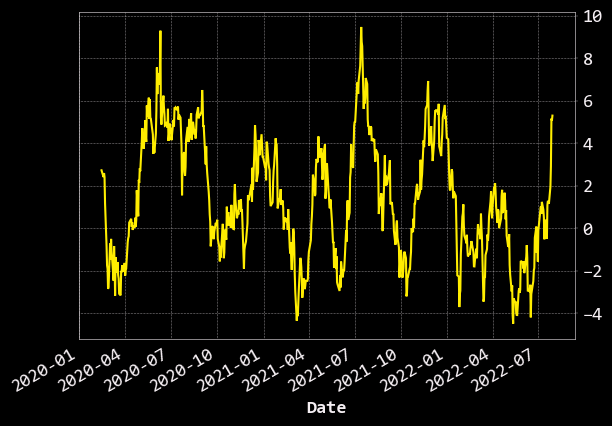

In [12]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot();

Use a histogram to visualize the distribution of rolling Sharpe ratios.

0.26218236810629014
0.26689748550385295
0.2687079431672197
0.2705270757739519
0.2769359394453068
0.30423133792725443
0.31855586584583007
0.31540333375940816
0.3634512436915605
0.3635942738155975
0.4581098656141469
0.4648245058122801
0.4858646425855915
0.49408513990651687
0.49464813197821256
0.5418676793343232
0.5809917501339292
0.5812245102859442
0.6373704318510723
0.7372806714241337
0.8139015963693327
0.827069871295069
0.8207332945275171
0.8194511032285557
0.8328729341717426
0.833440864871574
0.892506749533689
0.8925142297950369
0.9050573270463723
0.9107751103890286
0.9165137633601128
0.915899004706452
0.9235243641433419
0.9262894572698933
0.9254067359258081
0.9560323837957266
0.9518483735628142
0.9538288359740825
0.9345495070751767
0.9360875070760903
0.9076413991580498
0.9030648625276075
0.8930960865341167
0.8888565153117857
0.8901159874037667
0.8634194969944002
0.8416465566423403
0.8352240677135554
0.7826276298642385
0.7036730760610649
0.5889631020909567
0.5834772530895384
0.5784274

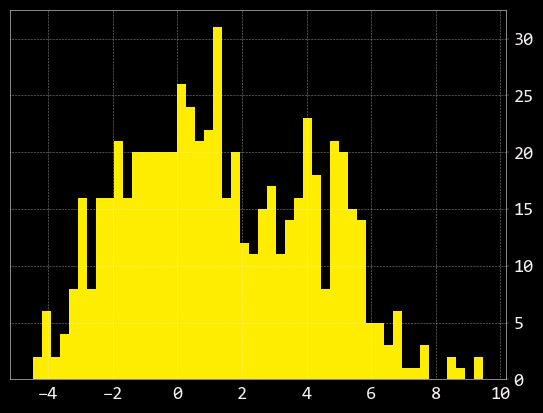

In [25]:
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50);

0.11795497041728421
0.11555081255937909
0.1157545681322115
0.1162349603594015
0.12046680443361758
0.15447825978168095
0.1771094393882097
0.1755081324052049
0.2156793441412961
0.21509615502783624
0.2522375154293778
0.263031763878321
0.29393364834939245
0.3076800715534279
0.30994054611159827
0.37794713017865883
0.4114847990843472
0.4294266157383132
0.5023278029245736
0.5710646874693696
0.6446308375485993
0.668578417440756
0.6764288863951803
0.6744207798916146
0.6799089730517799
0.680859702908396
0.7415601049077151
0.7442646529599484
0.768404116512469
0.7709279147701809
0.7794573078227807
0.77965568019925
0.7861645031911069
0.7916120723040584
0.7917968449214697
0.8175013153002608
0.8141274724614728
0.821382797558661
0.8130171874116005
0.8133238800184709
0.8077623581761778
0.805879224566014
0.795709127930166
0.7945647298782347
0.7947629804886384
0.7657295304146438
0.7534654997352386
0.7390570899302904
0.6792627413811779
0.6363968112295241
0.5406449912125789
0.5252492721529911
0.49979346488

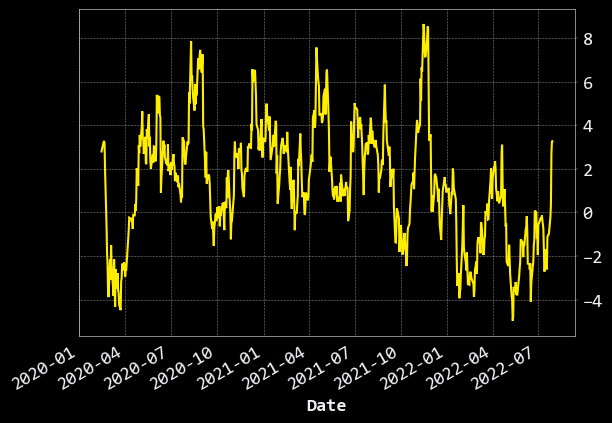

In [22]:
spy_returns.rolling(30).apply(sharpe_ratio).plot();

0.11795497041728421
0.11555081255937909
0.1157545681322115
0.1162349603594015
0.12046680443361758
0.15447825978168095
0.1771094393882097
0.1755081324052049
0.2156793441412961
0.21509615502783624
0.2522375154293778
0.263031763878321
0.29393364834939245
0.3076800715534279
0.30994054611159827
0.37794713017865883
0.4114847990843472
0.4294266157383132
0.5023278029245736
0.5710646874693696
0.6446308375485993
0.668578417440756
0.6764288863951803
0.6744207798916146
0.6799089730517799
0.680859702908396
0.7415601049077151
0.7442646529599484
0.768404116512469
0.7709279147701809
0.7794573078227807
0.77965568019925
0.7861645031911069
0.7916120723040584
0.7917968449214697
0.8175013153002608
0.8141274724614728
0.821382797558661
0.8130171874116005
0.8133238800184709
0.8077623581761778
0.805879224566014
0.795709127930166
0.7945647298782347
0.7947629804886384
0.7657295304146438
0.7534654997352386
0.7390570899302904
0.6792627413811779
0.6363968112295241
0.5406449912125789
0.5252492721529911
0.49979346488

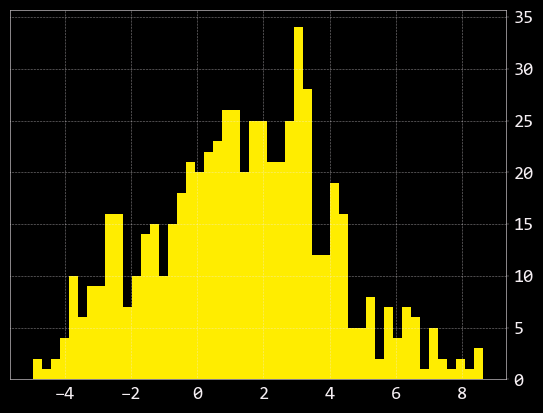

In [26]:
spy_returns.rolling(30).apply(sharpe_ratio).hist(bins = 50);

Subtract the SPY Sharpe ratio from the AAPL Sharpe ratio and plot the result as a histogram.


0.26218236810629014
0.26689748550385295
0.2687079431672197
0.2705270757739519
0.2769359394453068
0.30423133792725443
0.31855586584583007
0.31540333375940816
0.3634512436915605
0.3635942738155975
0.4581098656141469
0.4648245058122801
0.4858646425855915
0.49408513990651687
0.49464813197821256
0.5418676793343232
0.5809917501339292
0.5812245102859442
0.6373704318510723
0.7372806714241337
0.8139015963693327
0.827069871295069
0.8207332945275171
0.8194511032285557
0.8328729341717426
0.833440864871574
0.892506749533689
0.8925142297950369
0.9050573270463723
0.9107751103890286
0.9165137633601128
0.915899004706452
0.9235243641433419
0.9262894572698933
0.9254067359258081
0.9560323837957266
0.9518483735628142
0.9538288359740825
0.9345495070751767
0.9360875070760903
0.9076413991580498
0.9030648625276075
0.8930960865341167
0.8888565153117857
0.8901159874037667
0.8634194969944002
0.8416465566423403
0.8352240677135554
0.7826276298642385
0.7036730760610649
0.5889631020909567
0.5834772530895384
0.5784274

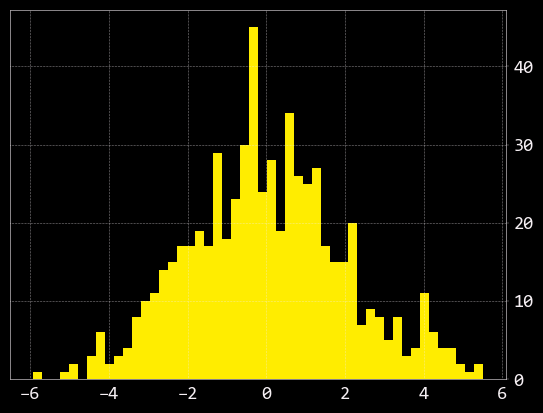

In [28]:
(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins = 50);